### Logistic Regression Classification - Visual QST & Responsiveness to Treatment Across 5 Chronic Pain Cohorts

In [1]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

In [2]:
## Load in data
data = pd.read_csv("/Users/noahwaller/Documents/3cohort-GIMME PAPER/csv_for-code/7cohort_visQST_allmetrics_outrem.csv", delimiter = ",")
data.head()

,subid,cohort,age,sex,vis01_unpl_avg,vis02_unpl_avg,vis03_unpl_avg,vis04_unpl_avg,vis05_unpl_avg,vis06_unpl_avg,...,pd02_bsl,wpi_bsl,sss_bsl,fm_score_bsl,pd02_6m,wpi_6m,sss_6m,fm_score_6m,responder_ratio,responder_bin
0,1,0,27,1,32.333333,36.333333,44.000000,57.000000,60.666667,61.666667,...,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0,30,1,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0,61,1,27.333333,27.000000,39.000000,38.333333,43.000000,41.666667,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0,45,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0,53,1,13.000000,8.666667,13.333333,10.000000,8.000000,7.666667,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
## Requires no missing values
data.dropna(subset=['responder_bin'], inplace=True)
data.dropna(subset=['fm_score_bsl'], inplace=True)
data.dropna(subset=['sss_bsl'], inplace=True)
data.dropna(subset=['wpi_bsl'], inplace=True)
data.dropna(subset=['pd02_bsl'], inplace=True)
data


,subid,cohort,age,sex,vis01_unpl_avg,vis02_unpl_avg,vis03_unpl_avg,vis04_unpl_avg,vis05_unpl_avg,vis06_unpl_avg,...,pd02_bsl,wpi_bsl,sss_bsl,fm_score_bsl,pd02_6m,wpi_6m,sss_6m,fm_score_6m,responder_ratio,responder_bin
68,1002,1,42,1,10.333333,13.000000,26.666667,34.666667,43.000000,65.666667,...,10.0,8.0,7.0,15.0,10.0,5.0,8.0,13.0,1.000000,0.0
69,1003,1,57,1,1.666667,3.000000,3.333333,14.333333,13.000000,24.333333,...,9.0,2.0,2.0,4.0,8.0,2.0,3.0,5.0,0.888889,0.0
72,1007,1,38,1,43.666667,48.666667,52.333333,69.333333,90.000000,93.666667,...,10.0,4.0,10.0,14.0,3.0,0.0,6.0,6.0,0.300000,1.0
73,1008,1,55,0,48.000000,40.666667,48.333333,54.666667,53.333333,58.333333,...,9.0,5.0,9.0,14.0,8.0,7.0,10.0,17.0,0.888889,0.0
75,1010,1,51,1,55.000000,53.000000,53.000000,71.666667,71.333333,69.666667,...,8.0,3.0,7.0,10.0,8.0,3.0,6.0,9.0,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,8045,5,68,1,50.333333,51.666667,51.666667,54.666667,57.666667,56.666667,...,3.0,13.0,8.0,21.0,9.0,12.0,7.0,19.0,3.000000,0.0
248,8046,5,52,1,15.666667,9.666667,16.000000,11.666667,9.333333,14.000000,...,2.0,8.0,11.0,19.0,8.0,1.0,8.0,9.0,4.000000,0.0
250,8048,5,48,1,36.666667,43.333333,90.000000,95.000000,98.333333,99.000000,...,5.0,3.0,8.0,11.0,9.0,1.0,10.0,11.0,1.800000,0.0
251,8049,5,42,0,10.666667,13.333333,20.000000,18.666667,18.333333,17.000000,...,3.0,10.0,11.0,21.0,6.0,4.0,8.0,12.0,2.000000,0.0


In [4]:
## Import
from sklearn.model_selection import train_test_split

In [5]:
#split dataset in features and target variable
#feature_cols = ['vis01_unpl_avg', 'vis02_unpl_avg', 'vis03_unpl_avg', 'vis04_unpl_avg','vis05_unpl_avg','vis06_unpl_avg', 
                #'fm_score_bsl', 'wpi_bsl', 'sss_bsl']
feature_cols = ['vis_unpl_avg', 'vis_bright_avg', 'pd02_bsl', 'fm_score_bsl']
X = data[feature_cols] # Features
y = data.responder_bin # Target variable

In [6]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=8, stratify=y)

In [7]:
## import LogisticRegression
from sklearn.linear_model import LogisticRegression

In [8]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=9)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [9]:
# import the metrics class
from sklearn import metrics

# create confusion matrix 
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[14,  2],
       [ 6,  6]])

Text(0.5, 427.9555555555555, 'Predicted label')

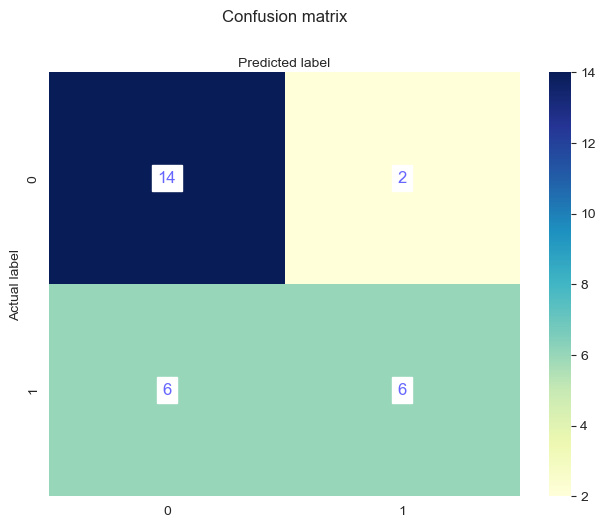

In [10]:
# visualize confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={'fontsize': 12, 'color':'b', 'alpha': 0.6,
                        'verticalalignment': 'center', 'backgroundcolor': 'w'}, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [11]:
from sklearn.metrics import classification_report

# print more easily interpretable report of accuracy, precision, and recall
target_names = ['Non-responder', 'responder']
print(classification_report(y_test, y_pred, target_names=target_names))

               precision    recall  f1-score   support

Non-responder       0.70      0.88      0.78        16
    responder       0.75      0.50      0.60        12

     accuracy                           0.71        28
    macro avg       0.72      0.69      0.69        28
 weighted avg       0.72      0.71      0.70        28



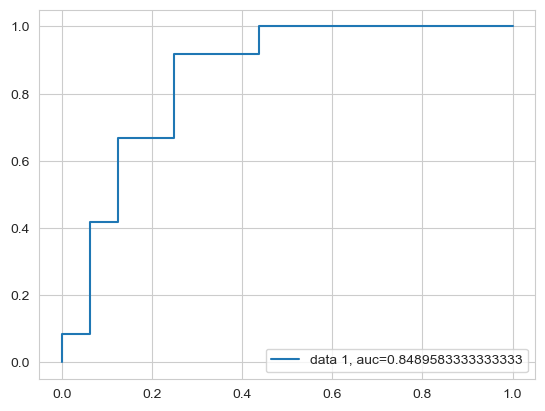

In [12]:
# create AUC graph for model performance visualization - .5 is a worthless model and 1 is perfect
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()